# Outlier detection with isolation forests

In [1]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

## Data loading

In [2]:
%run ../util/load_data.py
%run ../util/data_visualization.py

data = load_data("../data")

train_data_with_outliers = data['train_data'][data['numerical_attributes'] + ['Id']]

/Users/andrluc/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/andrluc/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


### Outlier detection with Isolation Forests

In [3]:
kf = KFold(n_splits=10)

outliers_ids = []

for train, test in kf.split(train_data_with_outliers):
    train_data = train_data_with_outliers.iloc[train, :]
    test_data = train_data_with_outliers.iloc[test, :]
    
    isolation_forest_classifier = IsolationForest(random_state=rng, behaviour='new')
    isolation_forest_classifier.fit(train_data)
    
    prediction_result = zip(
        train_data_with_outliers['Id'].values, 
        isolation_forest_classifier.predict(test_data)
    )
    
    outliers_ids += [id for id, is_not_outlier in prediction_result if is_not_outlier < 0]
    
total_outlier_percentage = 100*len(outliers_ids)/len(data['train_data'].index)
"Total outlier percentage: %f" % total_outlier_percentage

/Users/andrluc/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/andrluc/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/andrluc/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/andrluc/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarni

'Total outlier percentage: 13.974868'

### Outlier removal

In [4]:
train_data = data['train_data']

data_without_isolation_forests_outliers = train_data[~train_data['Id'].isin(outliers_ids)]
data_without_isolation_forests_outliers.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Type
9,10,2612,59,10,247,11,636,228,219,124,6230,5,9,1
17,18,2517,72,7,85,6,595,228,227,133,5607,5,8,1
37,38,2511,92,7,182,18,722,231,229,131,5494,5,8,1
60,61,2490,75,5,134,17,810,227,230,137,5218,5,8,1
64,65,2500,49,14,150,27,870,225,210,116,5205,5,8,1


# Visualization

### PCA Visualization

#### Old data

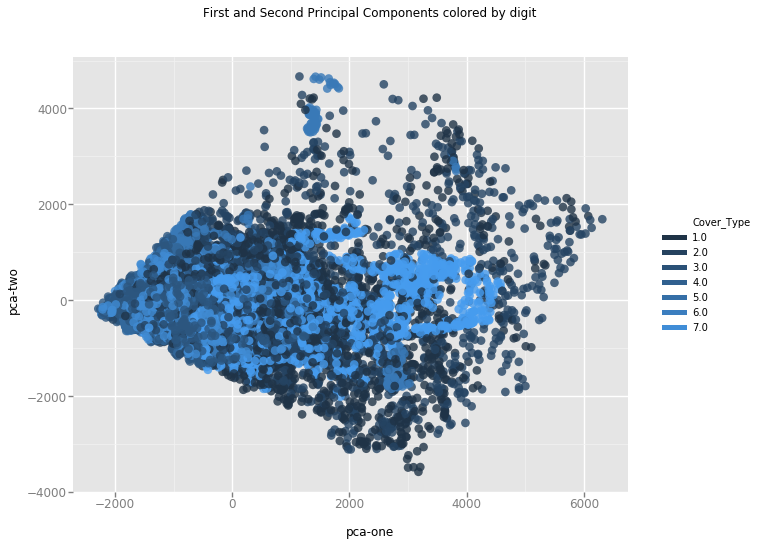

<ggplot: (297350257)>

In [5]:
pca_visualization(data['train_data'][data['numerical_attributes'] + data['target']], data['target'][0])

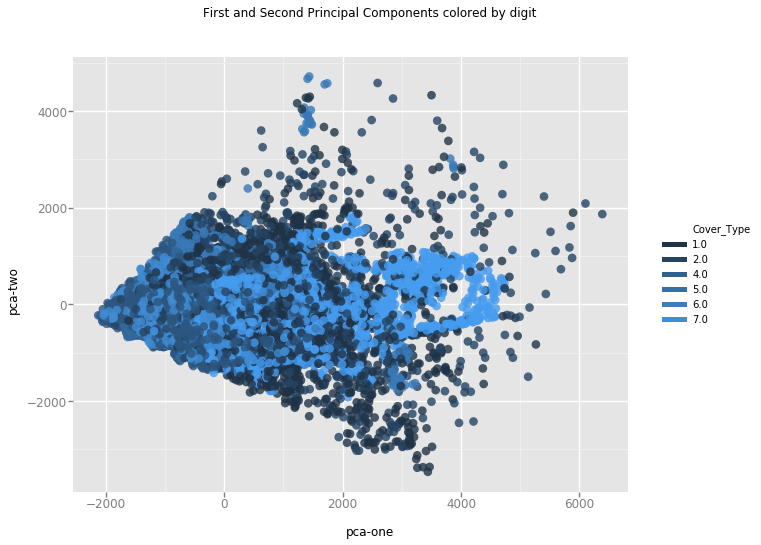

<ggplot: (297557056)>

In [6]:
pca_visualization(data_without_isolation_forests_outliers[data['numerical_attributes'] + data['target']], data['target'][0])

### TSNE

##### Old data

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 15120 samples in 0.011s...
[t-SNE] Computed neighbors for 15120 samples in 0.934s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15120
[t-SNE] Computed conditional probabilities for sample 2000 / 15120
[t-SNE] Computed conditional probabilities for sample 3000 / 15120
[t-SNE] Computed conditional probabilities for sample 4000 / 15120
[t-SNE] Computed conditional probabilities for sample 5000 / 15120
[t-SNE] Computed conditional probabilities for sample 6000 / 15120
[t-SNE] Computed conditional probabilities for sample 7000 / 15120
[t-SNE] Computed conditional probabilities for sample 8000 / 15120
[t-SNE] Computed conditional probabilities for sample 9000 / 15120
[t-SNE] Computed conditional probabilities for sample 10000 / 15120
[t-SNE] Computed conditional probabilities for sample 11000 / 15120
[t-SNE] Computed conditional probabilities for sample 12000 / 15120
[t-SNE] Computed conditional probabilities for sa

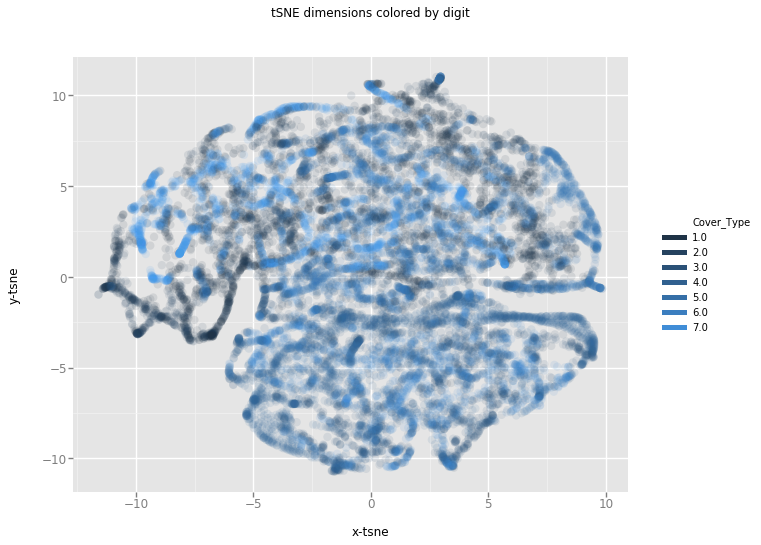

<ggplot: (298164572)>

In [7]:
tsne_visualization(data['train_data'][data['numerical_attributes'] + data['target']], data['target'][0])

##### Data without outliers

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 13939 samples in 0.012s...
[t-SNE] Computed neighbors for 13939 samples in 1.090s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13939
[t-SNE] Computed conditional probabilities for sample 2000 / 13939
[t-SNE] Computed conditional probabilities for sample 3000 / 13939
[t-SNE] Computed conditional probabilities for sample 4000 / 13939
[t-SNE] Computed conditional probabilities for sample 5000 / 13939
[t-SNE] Computed conditional probabilities for sample 6000 / 13939
[t-SNE] Computed conditional probabilities for sample 7000 / 13939
[t-SNE] Computed conditional probabilities for sample 8000 / 13939
[t-SNE] Computed conditional probabilities for sample 9000 / 13939
[t-SNE] Computed conditional probabilities for sample 10000 / 13939
[t-SNE] Computed conditional probabilities for sample 11000 / 13939
[t-SNE] Computed conditional probabilities for sample 12000 / 13939
[t-SNE] Computed conditional probabilities for sa

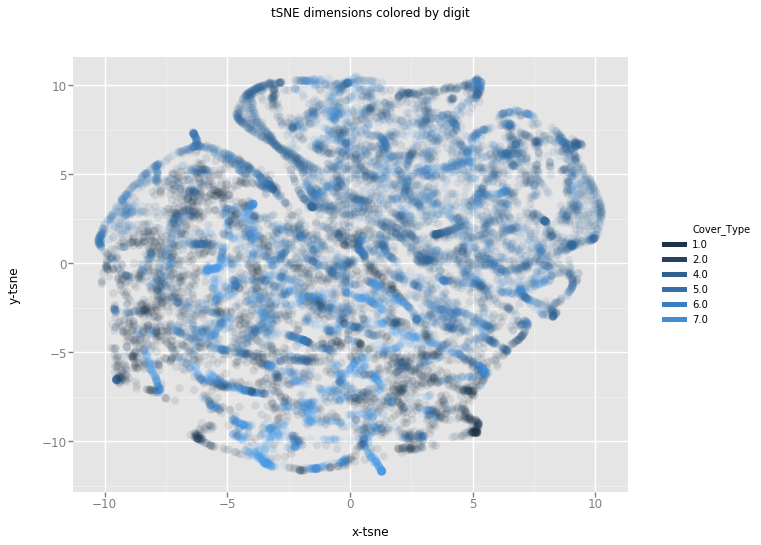

<ggplot: (289019817)>

In [8]:
tsne_visualization(data_without_isolation_forests_outliers[data['numerical_attributes'] + data['target']], data['target'][0])

### UMAP

##### Old data

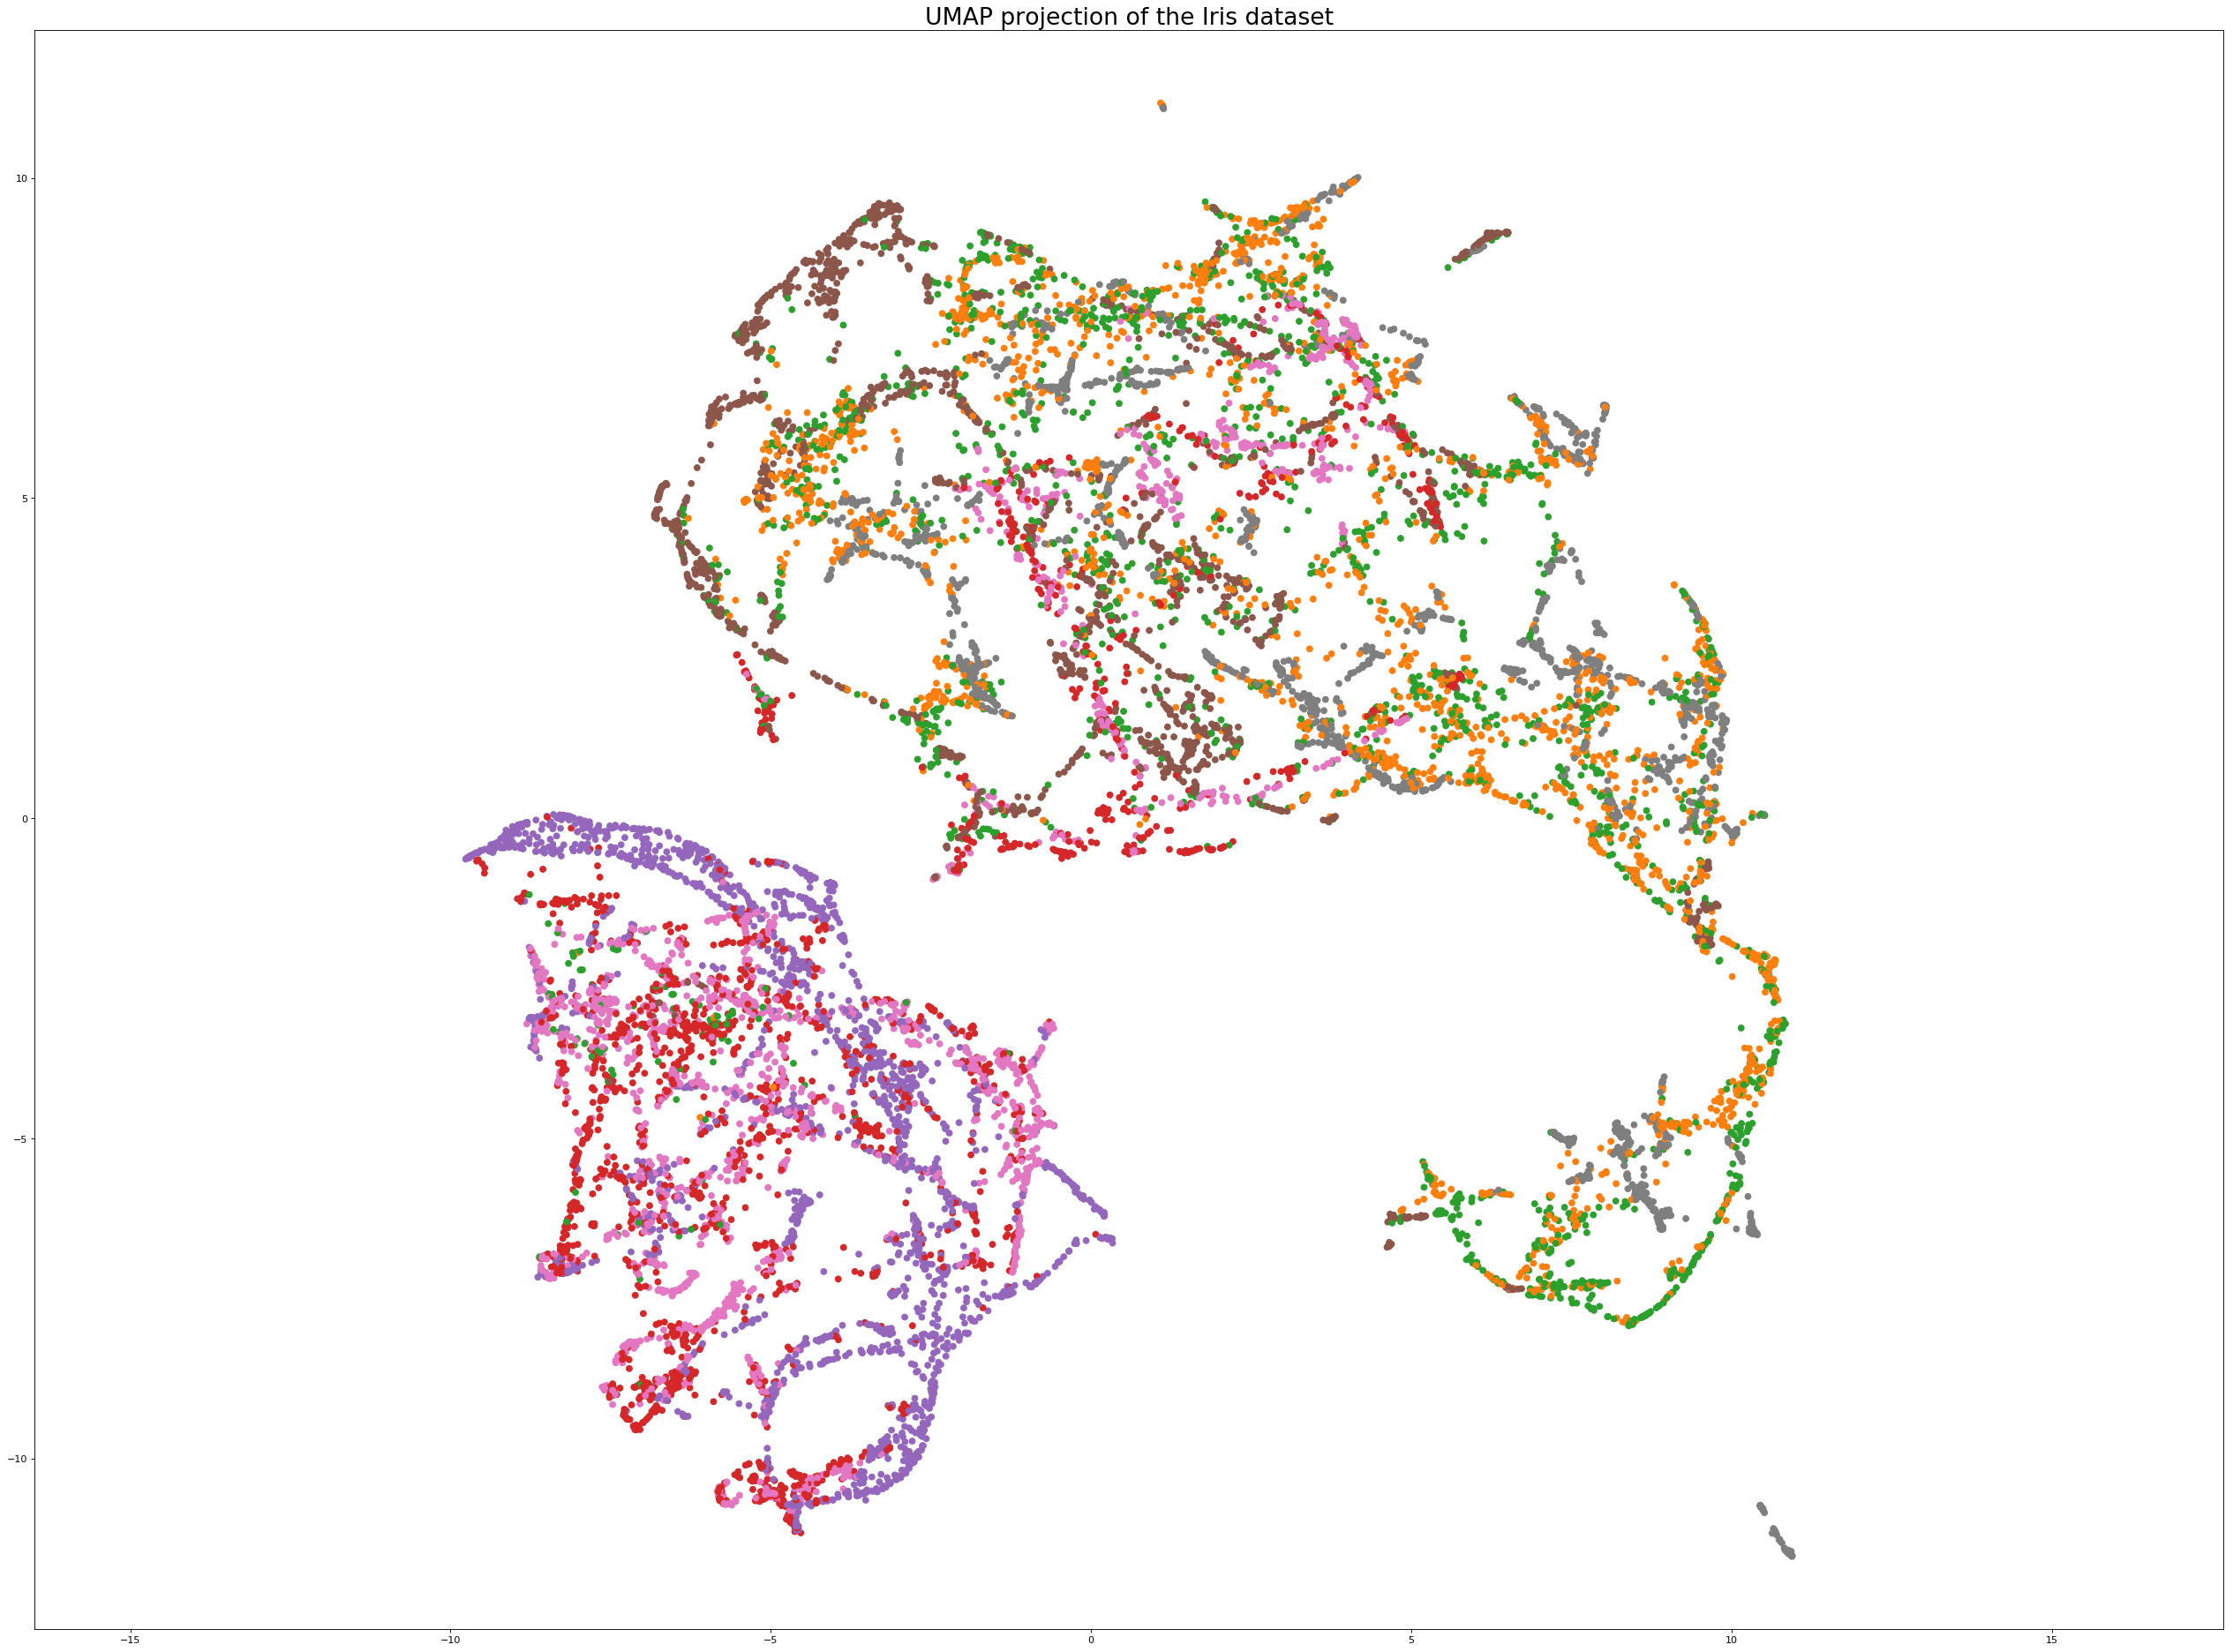

In [9]:
umap_visualization(data['train_data'][data['numerical_attributes'] + data['target']], data['target'][0])

##### Data without outliers

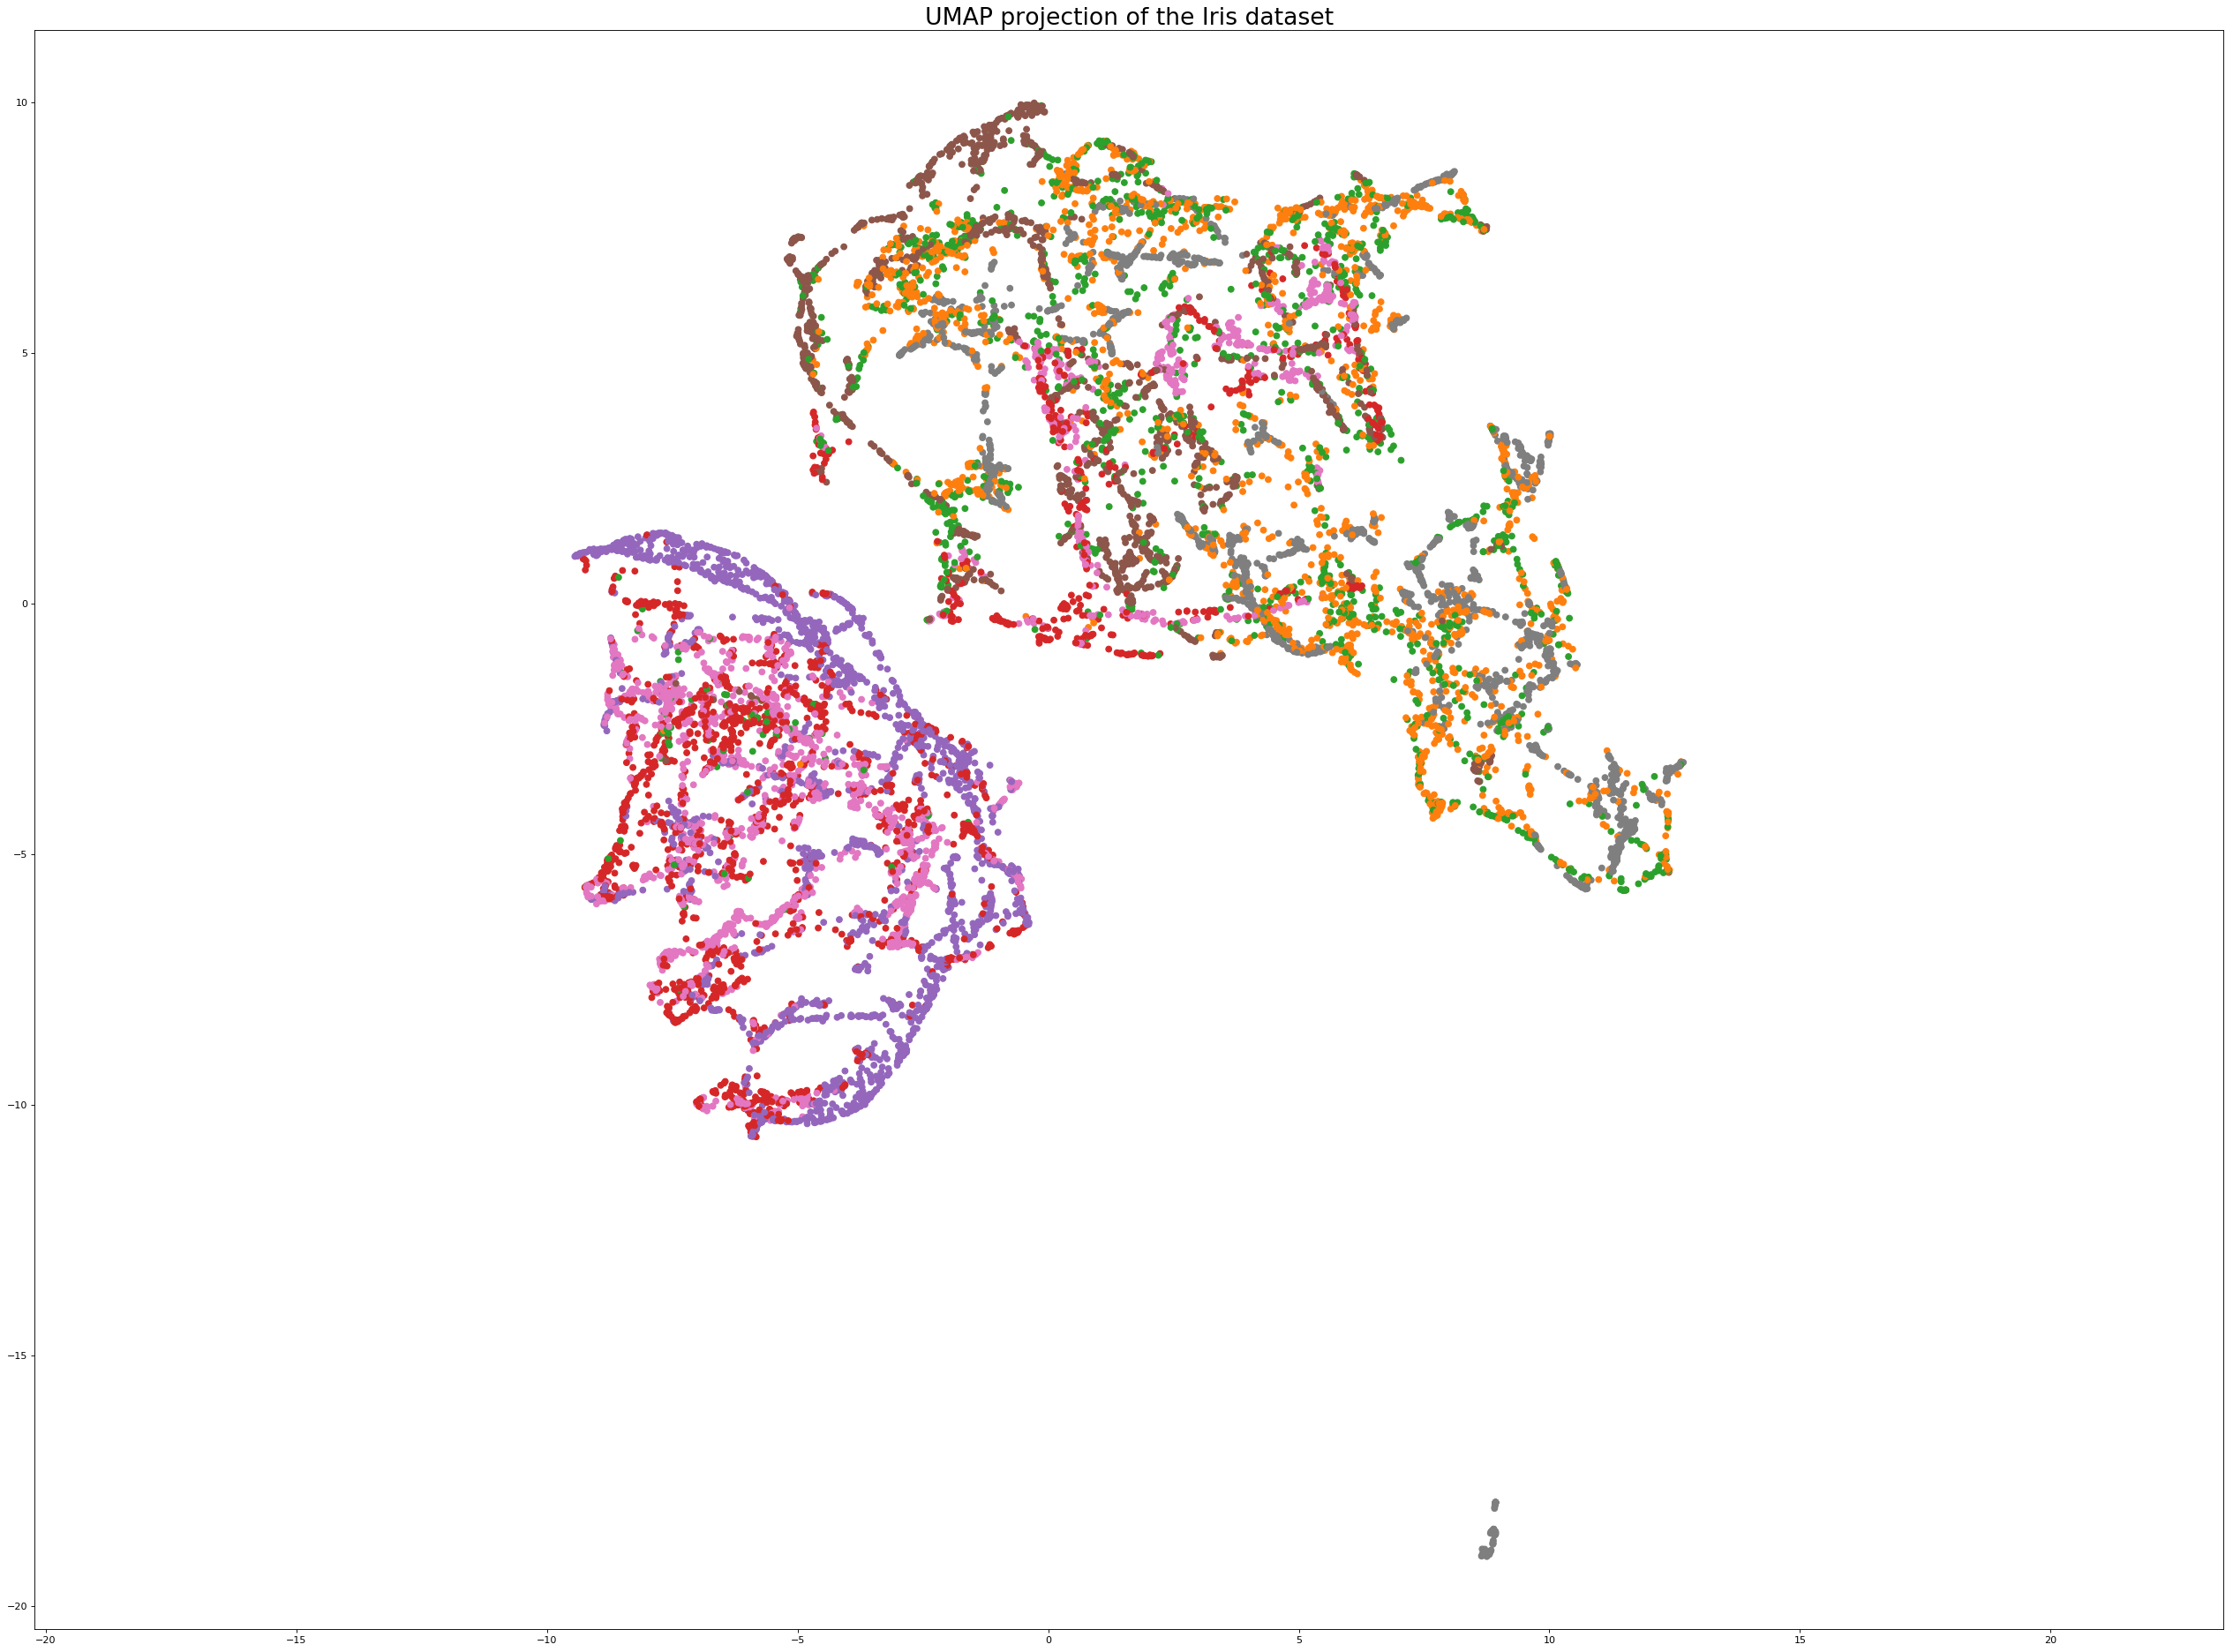

In [10]:
umap_visualization(data_without_isolation_forests_outliers[data['numerical_attributes'] + data['target']], data['target'][0])

### Projection pursuit

##### Old data

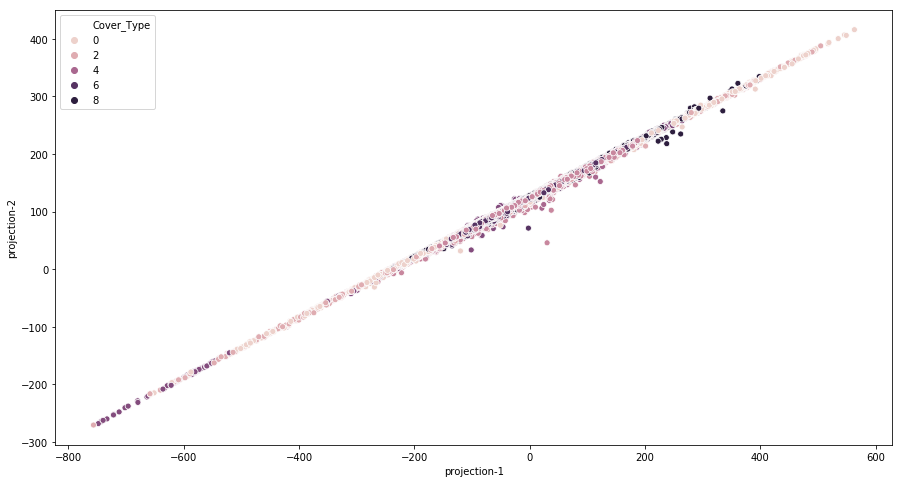

In [11]:
projection_pursuit_visualization(data['train_data'][data['numerical_attributes'] + data['target']], data['target'][0])

##### Data without outliers

In [14]:
projection_pursuit_visualization(data_without_isolation_forests_outliers[data['numerical_attributes'] + data['target']], data['target'][0])

KeyboardInterrupt: 